# Decision Trees:

Asking a couple of questions to get an an answer to ur classification with the highest informative questions starting first and the lowest informative questions kept to the end, e.g. if u want to predict whether a friend of urs will play tennis with u or not u have to ask important question about the features given in ur dataset to answer ur question will he play or not.


# Random Forest:

A Bunch of decision trees where every tree has a vote to the answer of the classification problem and the most voted answer will be given as the output of the random forest. It solves the decision tree habbit of overfitting into a training model.

# Aim:

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loans = pd.read_csv("loan_data.csv")

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# No missing data in our dataset.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

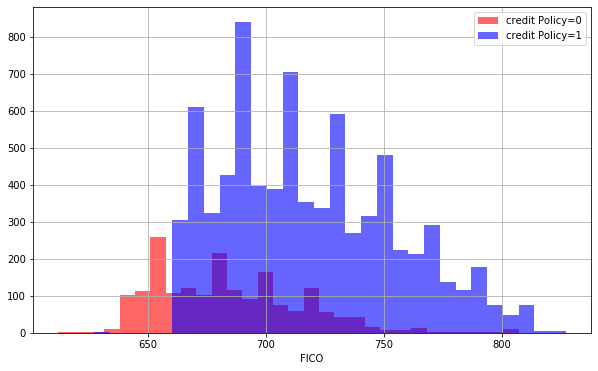

In [7]:
# Notice here that some ppl might have the same amount in their fico score yet some of them meet the credit card policy
# and some others may not.
# Also notice that ppl with fico balance less than 660 has no credict policy.
plt.figure(figsize=(10,6))
plt.xlabel("FICO")
d1 = loans[loans['credit.policy'] == 0].fico
d2 = loans[loans['credit.policy'] == 1].fico
d1.hist(bins=30, label='credit Policy=0', color='red', alpha=0.6)
d2.hist(bins=30, label='credit Policy=1', alpha=0.6, color='blue')
plt.legend()
plt.show()

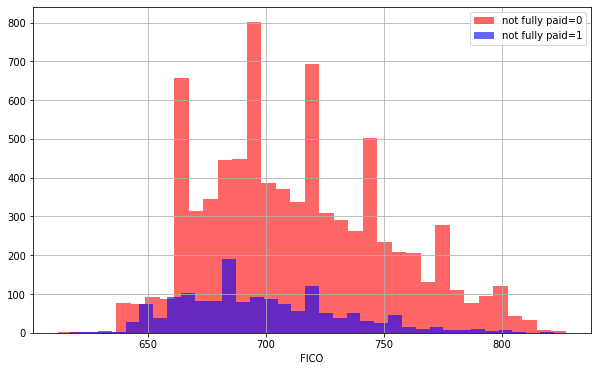

In [8]:
# Notice that most of the ppl that have fico score above 750 are ppl that have fully paid their debt.
plt.figure(figsize=(10,6))
plt.xlabel("FICO")
d1 = loans[loans['not.fully.paid'] == 0].fico
d2 = loans[loans['not.fully.paid'] == 1].fico
d1.hist(bins=35, label='not fully paid=0', color='red', alpha=0.6)
d2.hist(bins=35, label='not fully paid=1', alpha=0.6, color='blue')
plt.legend()
plt.show()

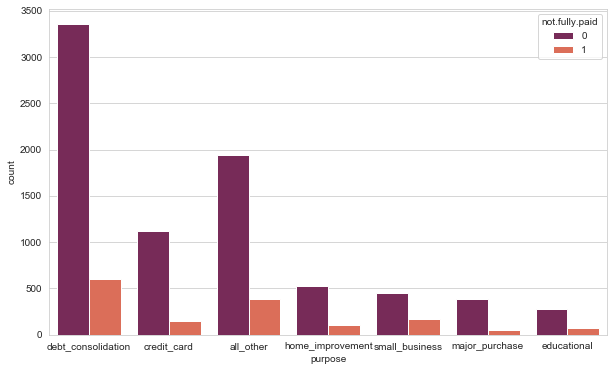

In [9]:
# Notice that almost half of the ppl that fully paid their debt are using debt_consolidation.
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=loans, hue='not.fully.paid', palette='rocket')

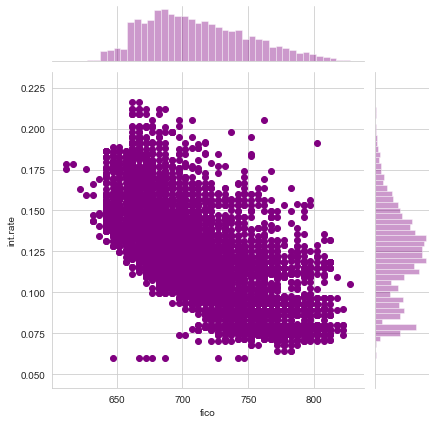

In [10]:
# Notice that as ur fico score increases the interest rate that u have to pay for ur loans decrease.
sns.jointplot(x='fico',y='int.rate',data=loans,kind='scatter', color='purple')

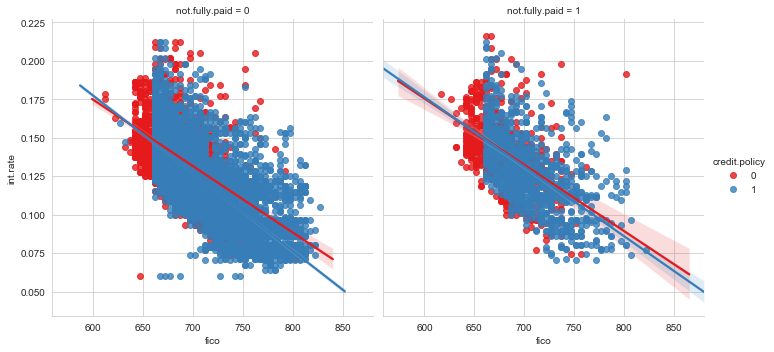

In [11]:
# The behavior is kind of the same whether or not the full paid, or have a credit policy or not.
sns.lmplot(x='fico',y='int.rate',data=loans, hue='credit.policy', palette="Set1", col='not.fully.paid')

# Data Preprocessing

In [12]:
# Notice that the purpose column is a categorical column so we will need to convert it to numerical for our model to deal with.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
categorical_feats = ['purpose']
# Data set containing only numerical data.
final_data = pd.get_dummies(loans,columns=categorical_feats,drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# The features to use to predict our dependent feature.
X = final_data.drop('not.fully.paid',axis=1)

# The feature we want to predict.
y = final_data['not.fully.paid']

# splitting our dataset to 2 sets 1 for training and 1 for testing our predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# DTree Model.
dtree = DecisionTreeClassifier()

In [18]:
# Training the model on the data with the answer of the dependent feature.
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# Predicting the test data with no answer of the dependent feature that we would like to predict.
predictions = dtree.predict(X_test)

In [20]:
len(predictions)

2874

In [21]:
len(y_test)

2874

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))
print()

# We have predicted 2102 correctly, 772 wrongly.
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874


[[1998  433]
 [ 339  104]]


# Random_Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# RForest model with specifiying the number of decision tree being 100.
rfc = RandomForestClassifier(n_estimators=600)

# Training the model on the data with the answer of the dependent feature.
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# Predicting the test data with no answer of the dependent feature that we would like to predict.
rfc_pred = rfc.predict(X_test)

In [26]:
# Notice we have much better results than the decision tree.
# However for the recall and f1-score for class 1 they both did bad.
print(classification_report(y_test,rfc_pred))
print()

# We predicted 2433 correctly, 441 wrongly.
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874


[[2422    9]
 [ 435    8]]
